In [1]:

using StaticArrays

import PyPlot

include("ParInitFlexible.jl")
include("GeiderV2Functions.jl")
include("NPSmallGeiderV2.jl")
include("NPLargeGeiderV2.jl")

NPLargeGeiderV2 (generic function with 1 method)

In [2]:




# Sensitivity Experiment: Fixed Light, Variable Nutrients

paramsV2 = ZeroDInitGeiderV2()
L = 10000
IDay = 240
I = 240
DayLength = 0.5
NMax = -6
NMin = -9
NVec = 10 .^range(NMin,stop=NMax,length=L)*1e6
NP=16
no3 = 0
PO4Vec = NVec*1

NPVecSmallGeider= zeros(L,1)
NPVecLargeGeider = zeros(L,1)
nutLimVecSmallGeider = zeros(L,1)
nutLimVecLargeGeider = zeros(L,1)
muVecSmallGeider = zeros(L,1)
muVecLargeGeider = zeros(L,1)


Temp = 25.0
q_fe = 1e-0
paramsV2["LFac"]=1.2




    #Temp = TVec[k]
Temp = 25.0
for i = 1:L
        nh4=NVec[i]
        po4 = PO4Vec[i]*1
        IrrInst = IDay
        #print(po4," ",no3," ",nh4,"\n")
        solSmallGeider = NPSmallGeiderV2(IDay,DayLength,IrrInst,Temp,po4,nh4,no3,q_fe,paramsV2)
        
        NPVecSmallGeider[i] = solSmallGeider[4]
        muVecSmallGeider[i] = solSmallGeider[3]
        
        solLargeGeider = NPLargeGeiderV2(IDay,DayLength,IrrInst,Temp,po4,nh4,no3,q_fe,paramsV2)
        
                
        NPVecLargeGeider[i] = solLargeGeider[4]
        muVecLargeGeider[i] = solLargeGeider[3]
 
        

end


        
        
        

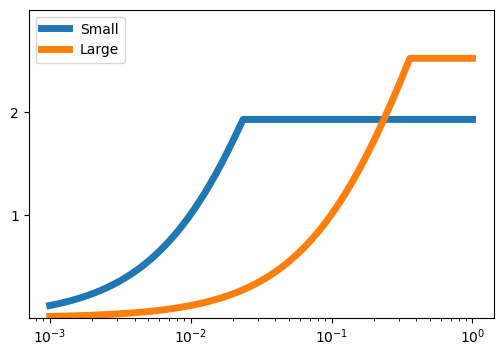

2-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.axis.YTick object at 0x7f4a28c91b80>
 PyObject <matplotlib.axis.YTick object at 0x7f4a28c918e0>

In [3]:
# Generating 



fig, ax = PyPlot.subplots(1,1,figsize=(6,4))



ax.plot(NVec,muVecSmallGeider[:,1],label="Small",linewidth=5)
#ax[2].plot(NVec,NPVecSmallGeider[:,ILevel],label="Small",linewidth=5)




ax.plot(NVec,muVecLargeGeider[:,1],label="Large",linewidth=5)
#ax[2].plot(NVec,NPVecLargeGeider[:,ILevel],label="Large",linewidth=5)

ax.set_ylim(0,3)


#ax[2].set_ylim(8,30)
ax.set_xscale("log")
#ax[2].set_xscale("log")
ax.legend()
ax.set_yticks([1,2])

#ax[2].set_yticks([10,15,20,25])
#PyPlot.savefig("MuPlankton.pdf",bbox_inches="tight")

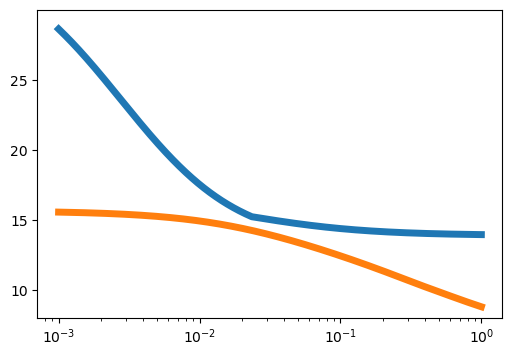

4-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.axis.YTick object at 0x7f4a2088dee0>
 PyObject <matplotlib.axis.YTick object at 0x7f4a2088db50>
 PyObject <matplotlib.axis.YTick object at 0x7f4a209f0ac0>
 PyObject <matplotlib.axis.YTick object at 0x7f4a2069e730>

In [4]:

fig, ax = PyPlot.subplots(1,1,figsize=(6,4))



#ax.plot(NVec,muVecSmallGeider[:,ILevel],label="Small",linewidth=5)
ax.plot(NVec,NPVecSmallGeider[:,1],label="Small",linewidth=5)




#ax.plot(NVec,muVecLargeGeider[:,ILevel],label="Large",linewidth=5)
ax.plot(NVec,NPVecLargeGeider[:,1],label="Large",linewidth=5)

#ax.set_ylim(0,3)


ax.set_ylim(8,30)
#ax.set_xscale("log")
ax.set_xscale("log")
#ax.legend()
#ax.set_yticks([1,2])

ax.set_yticks([10,15,20,25])
#PyPlot.savefig("NPPlankton.pdf",bbox_inches="tight")